# <font color='orange'> Problem Description </font>

#### Statement:
Identify potential fraud credit card applications.

#### Dataset Description
This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

8.  Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

9.  Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


# <font color='green'> Proposed Solution </font>

#### Proposed model: 
Self organising Maps (SOMs). 
This notebook uses Python implementation of SOM from the minisom package ( https://pypi.org/project/SimpSOM ).

#### Basis of Making Decision (fraud/non-fraud):
Fraudulent transactions are the outliers in the dataset, i.e., the attributes values do not follow the 'average normal' trend that fraudulent transactions follow.

Assuming null hypothesis to be true, outliers in the dataset will be marked as frauds. Further investigation would be required to possibly find examples that support the alternate hypothesis.

# <font color='blue'>Formulating the solution</font>

### Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Credit_Card_Applications.csv')

In [4]:
df.shape

(690, 16)

### EDA

In [5]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
df.tail()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1
689,15592412,1,41.00,0.040,2,10,4,0.040,0,1,1,0,1,560,1,1


#### Checking for missing values in any column

In [7]:
df.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [8]:
df.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [9]:
# At this point, it is unnecessary to do anything more to check for missing values, but just for seeing it visually:

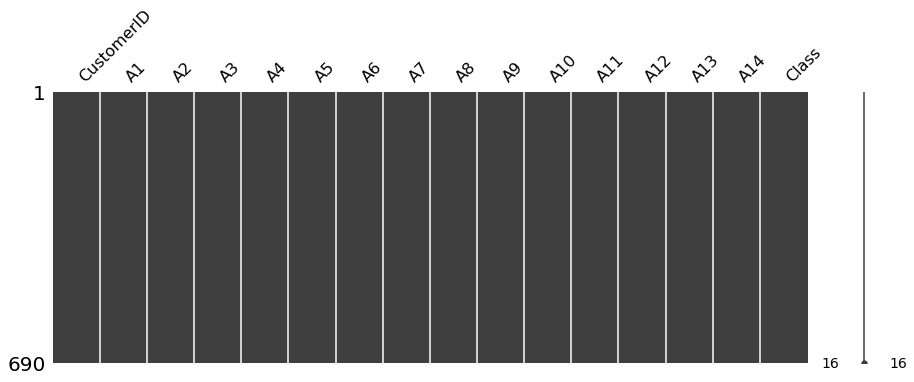

In [10]:
missingno.matrix(df, figsize=(15, 5))

** <font color='red'>Conclusion:</font>  ** No missing values in any feature<br>

In [11]:
df.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [12]:
df.Class.head()

0    0
1    0
2    0
3    1
4    1
Name: Class, dtype: int64

### 1. Univariate Analysis

In [13]:
def countplotter(data, column):
    sns.countplot(data=data, x=column)

In [14]:
def distplotter(data, column):
    sns.distplot(data[column])

In [15]:
df.dtypes

CustomerID      int64
A1              int64
A2            float64
A3            float64
A4              int64
A5              int64
A6              int64
A7            float64
A8              int64
A9              int64
A10             int64
A11             int64
A12             int64
A13             int64
A14             int64
Class           int64
dtype: object

#### 1.1. Feature: Class

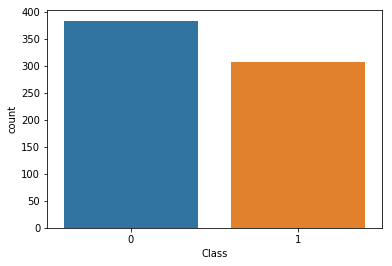

In [16]:
countplotter(data=df, column='Class')

#### <font color='red'>Gist:</font> 
The number of accepted and rejected applications are relatively not too different.<br>

In [17]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


#### 1.2. Feature: A1

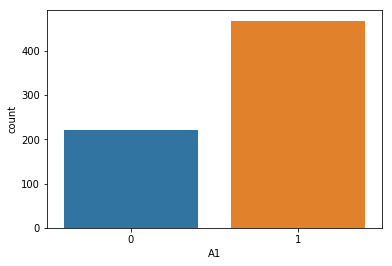

In [18]:
countplotter(data=df, column='A1')

#### 1.3. Feature: A2

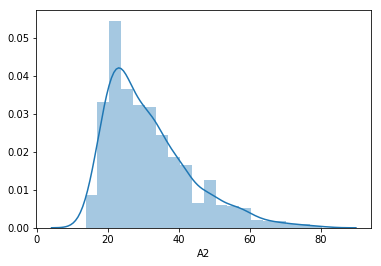

In [19]:
distplotter(data=df, column='A2')

#### 1.4. Feature: A3

In [20]:
df['A3'].value_counts()

1.500     21
3.000     19
2.500     19
0.000     19
0.750     16
1.250     16
0.500     15
5.000     14
4.000     12
1.750     12
6.500     12
10.000    10
2.000     10
1.000     10
0.585     10
11.000     9
0.375      9
0.540      8
12.500     8
0.165      8
3.500      8
0.835      8
7.000      8
5.500      8
11.500     8
9.000      7
2.750      7
0.875      6
0.290      6
1.540      6
          ..
16.165     1
16.000     1
9.625      1
12.625     1
2.125      1
25.125     1
8.125      1
18.125     1
10.335     1
4.750      1
9.790      1
28.000     1
9.960      1
2.835      1
3.375      1
10.085     1
12.125     1
17.750     1
3.625      1
7.540      1
11.835     1
14.585     1
5.625      1
10.415     1
10.750     1
10.210     1
21.000     1
8.170      1
6.040      1
7.080      1
Name: A3, Length: 215, dtype: int64

In [21]:
df['A3'].unique().shape

(215,)

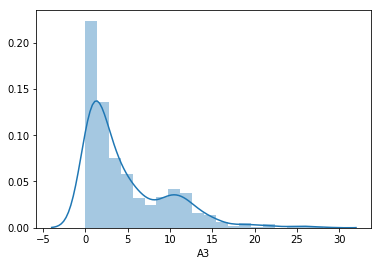

In [22]:
distplotter(df,column='A3')

#### Feature: A4

In [23]:
df['A4'].unique()

array([2, 1, 3])

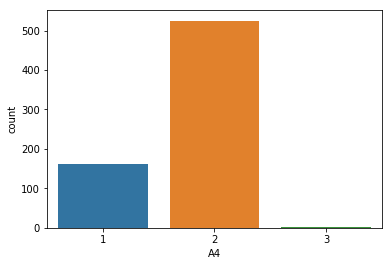

In [24]:
countplotter(data=df, column='A4')

#### Feature: A5

In [25]:
df['A5'].unique()

array([ 4,  8,  5,  6,  3, 11,  2, 14,  9, 13,  7,  1, 10, 12])

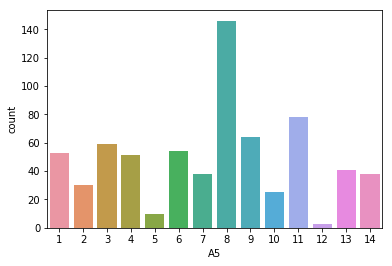

In [26]:
countplotter(data=df, column='A5')

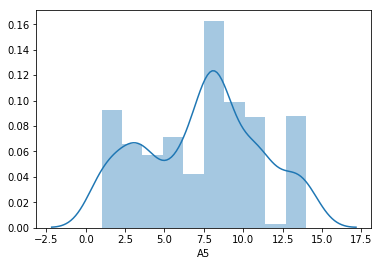

In [27]:
distplotter(data=df, column='A5')

#### Feauture: A6

In [28]:
df['A6'].unique()

array([4, 3, 8, 1, 5, 9, 2, 7])

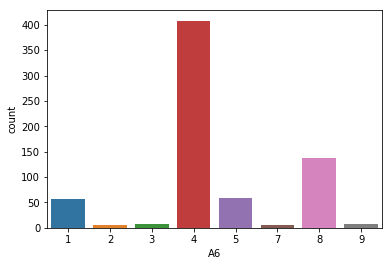

In [29]:
countplotter(data=df, column='A6')

#### Feature: A7

In [30]:
df['A7'].unique().shape

(132,)

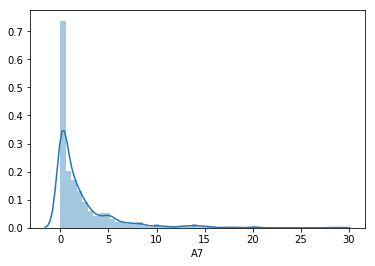

In [31]:
distplotter(data=df, column='A7')

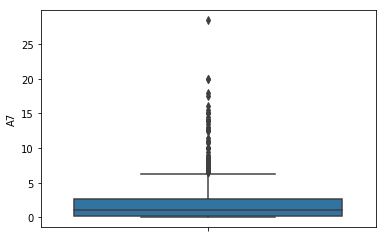

In [32]:
sns.boxplot(data=df, y='A7', hue='Class')

#### Feature: A8

In [33]:
df['A8'].unique().shape

(2,)

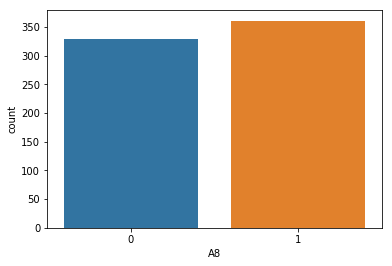

In [34]:
countplotter(data=df, column='A8')

#### Feature: A9

In [35]:
df['A9'].unique()

array([0, 1])

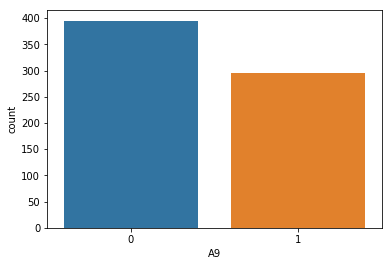

In [36]:
countplotter(data=df, column='A9')

#### Feature: A10

In [37]:
df['A10'].unique()

array([ 0, 11, 14,  2,  6,  3,  4,  7,  1,  8,  5, 12, 16,  9, 10, 15, 67,
       17, 19, 40, 13, 20, 23])

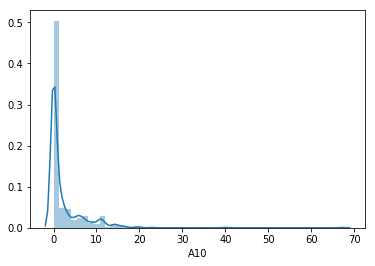

In [38]:
distplotter(data=df, column='A10')

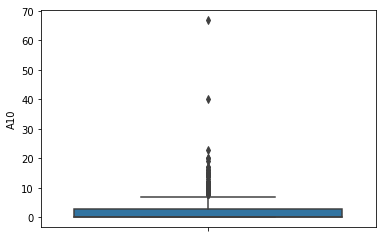

In [39]:
sns.boxplot(data=df, y='A10')

#### Feature: A11

In [40]:
df.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [41]:
df['A11'].unique()

array([1, 0])

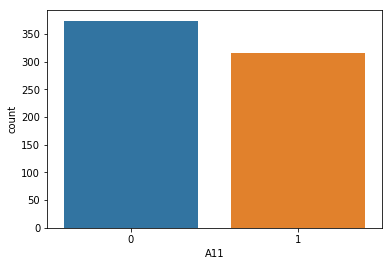

In [42]:
countplotter(data=df, column='A11')

#### Feature: A12

In [43]:
df['A12'].unique()

array([2, 1, 3])

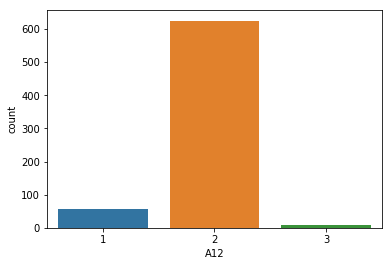

In [44]:
countplotter(data=df, column='A12')

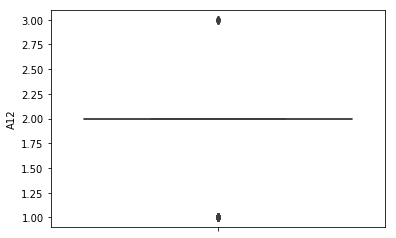

In [45]:
sns.boxplot(data=df, y='A12')

#### Feature: A13

In [46]:
df['A13'].unique().shape

(171,)

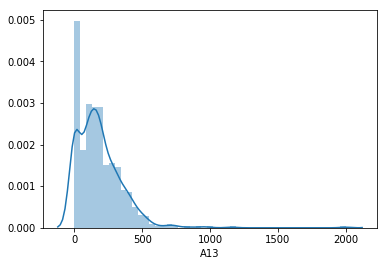

In [47]:
distplotter(data=df, column='A13')

#### Feature: A14

In [48]:
df['A14'].unique().shape

(240,)

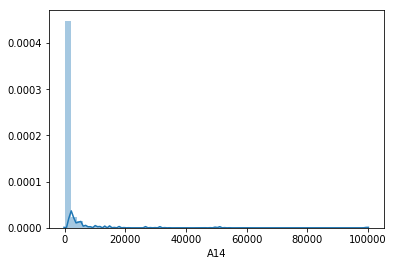

In [49]:
distplotter(data=df, column='A14')

### Feature Correlation 
Since each feature will be mapped to a corresponding most similar neuron, any two neurons corresponding to two highly correlated features are also expected to be correlated.

In [50]:
df.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [51]:
corr = df.corr()

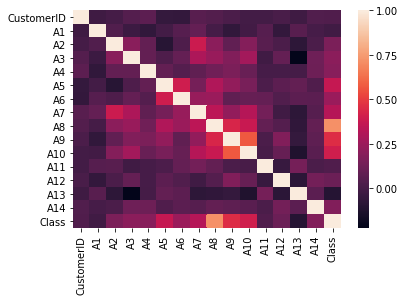

In [52]:
sns.heatmap(corr)

* ####  <font color='red'>On the basis of feature histograms and distribution plots, checking how many rows contain those values of the features that occur less frequently.</font>
If number of such rows is too low w.r.t. any feature, then those rows could be considered to be dropped. Also, if any feature takes a particular value **almost always** then, that feature would prbably be less helpful in determining the fraudulent applications. If any features, or any rows are dropped, then it should be checked whether the model still represents the actual scenario correctly or not. However, since the dataset itself is not that big (690 applications) and there is a very obvious potential that more customers will be applying in the future, we may choose not to drop any row because we would prefer a model that covers as many points in the space of applications as possible. This, however, still depends on the source of data. If it is a small village in Jharkhand, for eg, where the bank is located, then this dataset could very well be sufficient to model upon and represent the applications fairly exhaustively with the model. 

In [53]:
df.loc[df['A14'] > 500].shape

(162, 16)

In [54]:
#  6/690 rows
df.loc[df['A13'] > 12500].shape

(0, 16)

In [55]:
# 8/690 rows with value 3 and 57 with value 1 in column A12
df.loc[(df['A12'] == 3) | (df['A12'] == 1)]['A12'].value_counts()

1    57
3     8
Name: A12, dtype: int64

In [56]:
# All the rows could be removed -- for the given dataset, these may be outliers. But it is premature to suggest 
# anything as the number of applications may be too low.
df.loc[(df['A10'] > 18) | (df['A10'] > 20)]['A10'].value_counts()

20    2
23    1
19    1
67    1
40    1
Name: A10, dtype: int64

In [57]:
df.loc[df['A7'] > 15]['A7'].value_counts()

20.0    2
15.5    1
18.0    1
16.0    1
28.5    1
17.5    1
Name: A7, dtype: int64

In [58]:
df.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

* Bivariate Analysis does not seem to be required **as of now**, since it is the similarity of rows with the nodes in the SOM matters.

#### <font color='purple'>EDA Done - Leg 2</font>

### 3. Model Building - SOM

In [59]:
df.shape

(690, 16)

### Brief explanation about SOM

For an elaborate explanation, kindly refer to <a href='http://www.ai-junkie.com/ann/som/som1.html'>this link</a> for detailed explanation with Math.

In each iteration, a BMU is computed and then its neighbourhood is determined. Each iteration corresponds to a smaller neighbourhood size compared to the prior iterations. The weights of all the neighbours in the neighbourhood are updated. Adjustment to the weights is proportional to the distance from the BMU. Closer the neighbour, more its weight gets adjusted. This is the learning prhase of the SOM algorithm.

* BMU is:
    * A node chosen from all the nodes in the lattice for *one input vector*. The node which is most similar to the current input is chosen as the BMU.
    * A metric should be decided to quantify the measure of similarity. Euclidean distance can be used.
    * Node with least value of euclidean distance from the current input is called as the BMU.
    * Note: Number of components in a weight vector of a node is equal to the number of components in each input vector.

![image.png](attachment:image.png "Euclidean distance computation for jth node in the lattice")
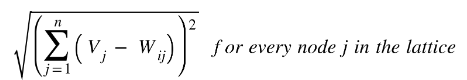

* Neighbourhood of BMU:
    * Figure 1 conceptually shows the neighbourhood of a BMU (yellow node) at some time t (the notion of time is fulfilled in the form of iterations- each iteration represents moment in time. We can have as many snapshots as shown in figure 1, each taken at a particular ith iteration (time t)) which is centered at the BMU.

![image.png](attachment:image.png "Neighbourhood of BMU") <center> Fig. 1. src: http://www.ai-junkie.com/ann/som/som3.html</center>
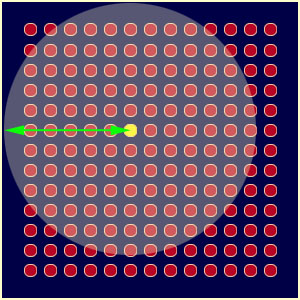

* Weight updation for every node for a node with weight vector W:

![image.png](attachment:image.png "Weight updation formula")
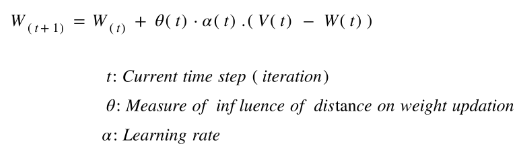

The learning rate (in weight updation equation) also is reduced over time as follows:
![image.png](attachment:image.png "Learning rate updation")
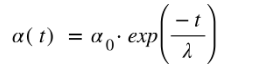

Measure of influence updation:
    ![image.png](attachment:image.png "Influence of distance on weight updation")
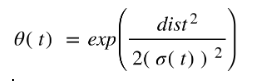

### Code implementation
(minisom package: https://pypi.org/project/SimpSOM/)

#### 1. Feature Extraction 

In [60]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


#### <font color='blue'> Hypothesis 1: Customer ID cannot be an indication of fraudulent applications</font>
#### <font color='blue'>Hypothesis 2: We also do not need Class since we are supposed to use feature values to segment the users</font>

In [61]:
X = df.iloc[:, 1:-1]
labels = df.iloc[:, -1]
customers_id = df.iloc[:, 0]

In [62]:
X.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14'],
      dtype='object')

#### 2. Data Preprocessing

**Feature scaling**

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
# by default feature_range=(0,1)
scaler = MinMaxScaler()

In [65]:
X = scaler.fit_transform(X)

In [66]:
X[:5]

array([[1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
        0.375     , 0.05561404, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.05      , 0.01212   ],
       [0.        , 0.13413534, 0.25      , 0.5       , 0.53846154,
        0.375     , 0.00578947, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.08      , 0.        ],
       [0.        , 0.23804511, 0.0625    , 0.        , 0.23076923,
        0.375     , 0.04385965, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.14      , 0.        ],
       [0.        , 0.11909774, 0.41071429, 0.        , 0.30769231,
        0.25      , 0.        , 1.        , 1.        , 0.1641791 ,
        1.        , 0.5       , 0.        , 0.        ],
       [1.        , 0.09654135, 0.29178571, 0.5       , 0.38461538,
        0.375     , 0.06877193, 1.        , 1.        , 0.20895522,
        0.        , 0.5       , 0.03      , 0.00158   ]])

#### 3. SOM code

In [67]:
from minisom import MiniSom

In [68]:
X.shape

(690, 14)

#### <font color='green'>**som = MiniSom(x, y, input_len, sigma, learning_rate)**</font>

#### Determing x and y

<a href='https://www.researchgate.net/post/How_many_nodes_for_self-organizing_maps'>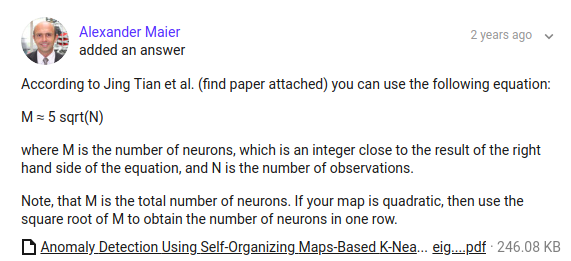</a>

Still, there is no widely used rule of thumb to determine the number of neurons.
For our purpose, since we want to be as sure as we can be about identifying a potential fraud application, we shall choose a relatively small values for x and y than x = y = int(5 * sqrt(690)) = 131 (approx.). This is because, the greater the values of x and y are, more the number of points away from the BMU. This makes it more likely to have relatively higher number of neurons in the SOM that are not similar to each other because as we move away from the BMUs, the amount of updation done to each neuron becomes lesser (depicted in the previous section).
Generally, it is advisable to take 50 rows per neuron. This means, we should start somewhere around 14. However, we start with 8, to be more precise in our identifications.

In [69]:
x = y = 10

In [70]:
print(x, y)

10 10


In [71]:
sigma = max(x, y)/2 ## reference: http://www.ai-junkie.com/ann/som/som3.html

In [72]:
learning_rate = 0.1 ## reference: http://www.ai-junkie.com/ann/som/som4.html

In [75]:
som = MiniSom(x=x, y=y, input_len=14, sigma=sigma, learning_rate=learning_rate, random_seed=1)
som.random_weights_init(X)

In [76]:
som.train_random(data=X, num_iteration=100)

### Visualising the SOM
We shall plot the **Mean Interneuron Distance (MID)** of the neurons/nodes.
MID of a neuron is the mean of distances of all the neurons in the neighbourhood of the particular neuron.
The node on the SOM representing an outlier should have the highest value of MID.

In [77]:
from pylab import bone, pcolor, colorbar, plot, show

In [78]:
bone() # create a figure to draw upon

<Figure size 432x288 with 0 Axes>

In [79]:
# Mean Interneuron Distance matrix
mids = som.distance_map()

In [80]:
mids.shape

(10, 10)

In [81]:
print(mids[:3, :3])

[[0.20835363 0.38473441 0.41799777]
 [0.31288133 0.57534219 0.68421986]
 [0.31363987 0.52634367 0.67940436]]


In [82]:
df.iloc[0]

CustomerID    1.577616e+07
A1            1.000000e+00
A2            2.208000e+01
A3            1.146000e+01
A4            2.000000e+00
A5            4.000000e+00
A6            4.000000e+00
A7            1.585000e+00
A8            0.000000e+00
A9            0.000000e+00
A10           0.000000e+00
A11           1.000000e+00
A12           2.000000e+00
A13           1.000000e+02
A14           1.213000e+03
Class         0.000000e+00
Name: 0, dtype: float64

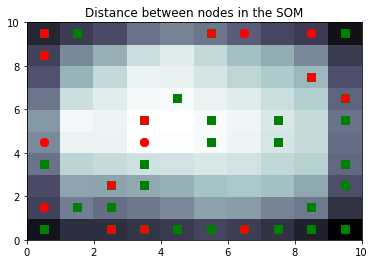

In [83]:
markers = ['o', 's']
colors = ['r', 'g']

pcolor(mids.T) # see the documentation of pylab.pcolor for the reason of putting mids.T instead of mids
plt.title('Distance between nodes in the SOM')

plot_trans_ids = {}

for i, row in enumerate(X):
    w = som.winner(row)
#     print(w)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[labels[i]],
         markeredgecolor=colors[labels[i]],
         markerfacecolor=colors[labels[i]],
         markersize=8,
         markeredgewidth=1)
    if (w[0], w[1]) not in plot_trans_ids:
        plot_trans_ids[(w[0], w[1])] = [(df.iloc[i, 0], df.iloc[i, -1])]
    else:
        plot_trans_ids[(w[0], w[1])].append((df.iloc[i, 0], df.iloc[i, -1]))
show()

### Finding the (potential) frauds
From the above SOM, the squares which are whiter are more likely to be potential frauds.
As of now, we shall be manually picking up the coordinates of such squares. 
In case of larger datasets and therefore, larger number of neurons, we may set a lower limit for the value of MID above which any neuron can be labelled as fraud. For eg, we may choose value at `(2, 0)` as the lower limit. Thus, any value in the above grid which is greater than the value at `(2, 0)` can be declared as potential fraud. What value should be set as a lower limit is a business decision. If we set a relatively larger lower limit, we shall get fewer identifications which will be more likely to be frauds.

Also, we may be interested in those applications which could be potential frauds, but their applications got accepted.

In [86]:
potential_frauds = []
potential_frauds.append(plot_trans_ids[(3, 4)])
potential_frauds.append(plot_trans_ids[(3, 5)])

In [87]:
potential_frauds

[[(15609823, 0), (15658504, 0)],
 [(15587297, 0),
  (15614813, 1),
  (15706268, 1),
  (15653147, 0),
  (15721507, 1),
  (15711249, 0),
  (15687765, 0),
  (15700046, 0),
  (15587443, 0)]]

#### <font color='red'> Customer with ID `15676909` is suspected to be a fraud and his application got accepted</font>

In [89]:
df.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [112]:
df.dtypes

CustomerID      int64
A1              int64
A2            float64
A3            float64
A4              int64
A5              int64
A6              int64
A7            float64
A8              int64
A9              int64
A10             int64
A11             int64
A12             int64
A13             int64
A14             int64
Class           int64
dtype: object

In [91]:
fraud_1 = df.loc[df.CustomerID == 15609823]

In [92]:
fraud_1

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
225,15609823,1,28.75,1.165,2,4,4,0.5,1,0,0,0,1,280,1,0


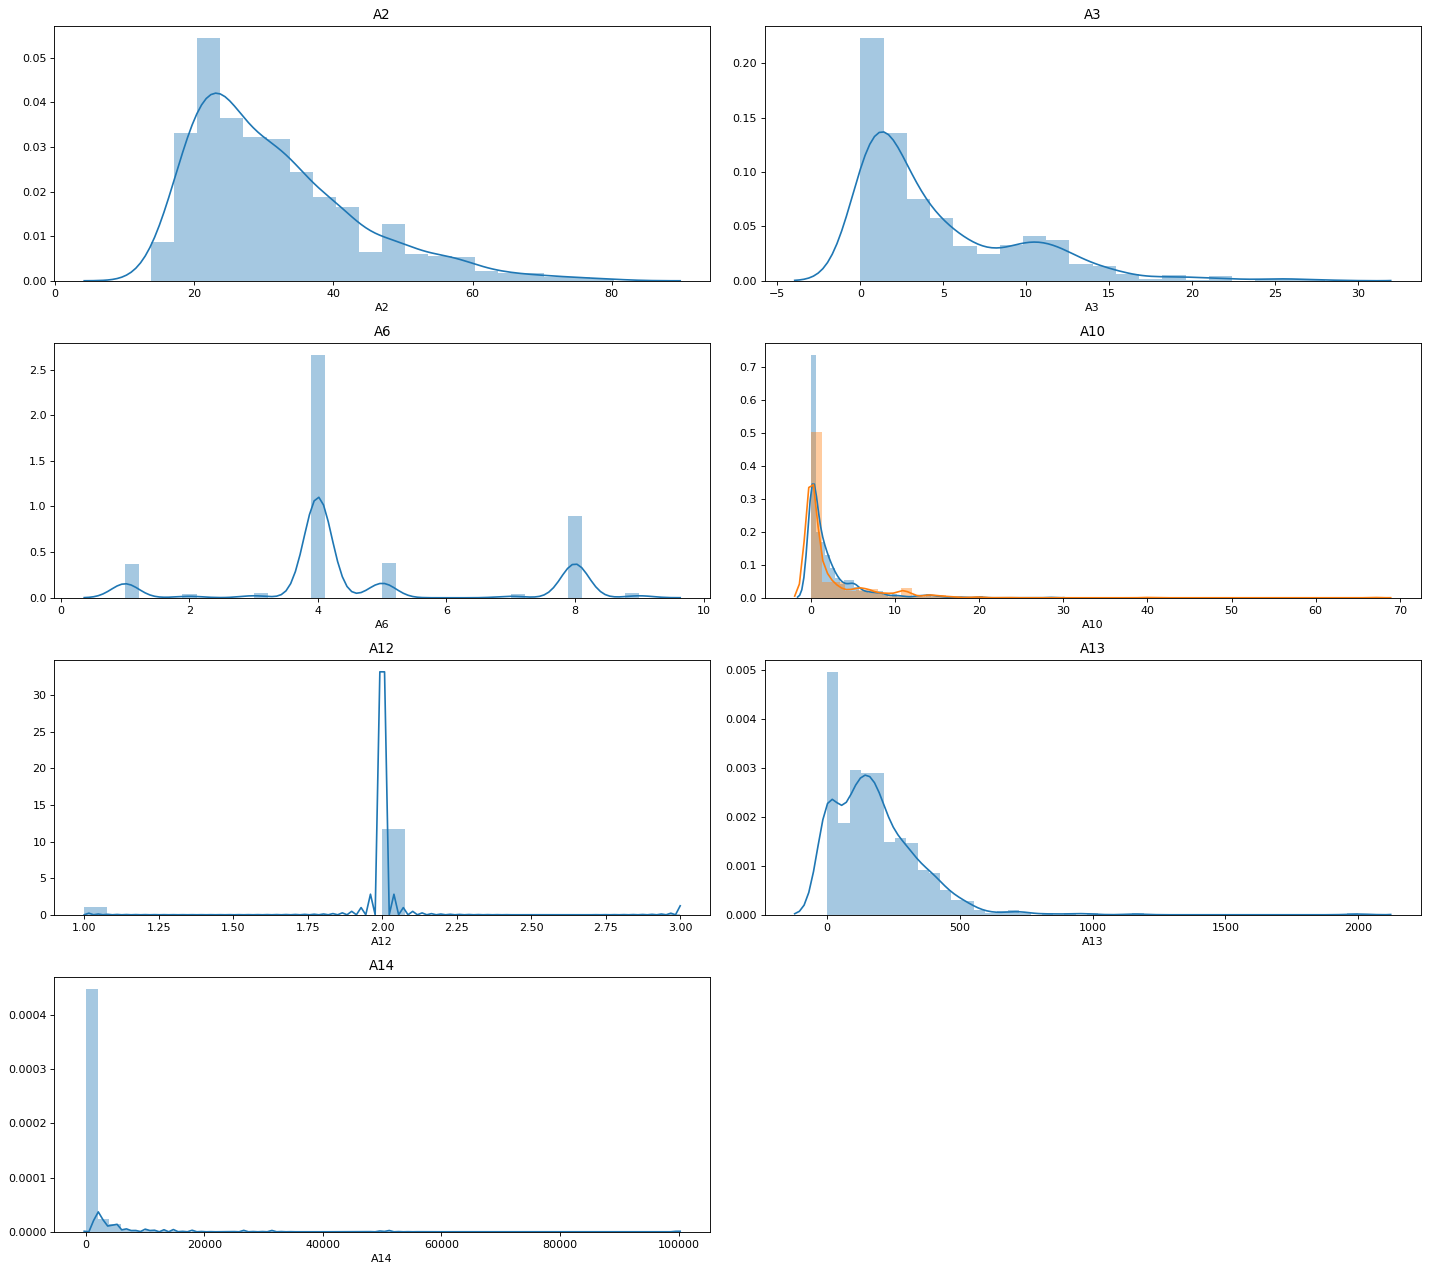

In [127]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(421)
# plt.title('A2')
sns.distplot(df['A2'])

plt.subplot(422)
plt.title('A3')
sns.distplot(df['A3'])

plt.subplot(423)
plt.title('A6')
sns.distplot(df['A6'])

plt.subplot(424)
plt.title('A7')
sns.distplot(df['A7'])

plt.subplot(424)
plt.title('A10')
sns.distplot(df['A10'])

plt.subplot(425)
plt.title('A12')
sns.distplot(df['A12'])

plt.subplot(426)
plt.title('A13')
sns.distplot(df['A13'])

plt.subplot(427)
plt.title('A14')
sns.distplot(df['A14'])

plt.tight_layout()
plt.show()

In [ ]:
#### <font color='green'>